# Esteban Gomez Buitrago
# z5627462

In [2]:
pip install numpy pygame matplotlib pandas


Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pygame
import random
import matplotlib.pyplot as plt

pygame 2.6.1 (SDL 2.28.4, Python 3.10.14)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Task 1 - Q-learning Algorithm

In [5]:
from env import StaticGridEnv
from utils import plot_comparison_with_baseline
import pandas as pd
import os 
#To be able to replicate results
env = StaticGridEnv(seed =42)
gamma = 0.99  # Discount factor
alpha = 0.5   # Learning rate
epsilon = 0.7 # Exploration rate for ε-greedy policy
epsilon_decay = 0.995  # Decay rate for exploration
epsilon_min = 0.01  # Minimum exploration rate

# Initialize the Q-table with zeros
q_table = np.zeros((10, 10, 4))  # Shape: (grid_size, grid_size, action_space)

max_steps_per_episode = 100 # Maximum steps to take per epidose
total_episodes= 30
successful_episodes = 0

cumulative_rewards = []

total_rewards = 0  # Cumulative reward across all episodes
total_steps = 0    # Cumulative steps across all episodes


In [ ]:
for episode in range(total_episodes):  
    state = env.reset()
    done = False
    episode_rewards = 0
    
    for step in range(max_steps_per_episode):
        x, y = state 
        
        # Choose action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = np.random.randint(0, env.action_space)  # Explore: random action
        else:
            action = np.argmax(q_table[x, y])  # Exploit: best known action
            
        # Take step and observe results
        next_state, reward, done, _ = env.step(action)
        episode_rewards += reward
        next_x, next_y = next_state

        env.render(delay=0.1, episode = episode , learning_type ="Q-learning")
        
        # Update Q-value using the Q-learning formula
        best_future_q = np.max(q_table[next_x, next_y])  # Best Q-value for next state
        q_table[x, y, action] = q_table[x, y, action] + alpha * (
            reward + gamma * best_future_q - q_table[x, y, action]
        )
        
        state = next_state

        if done:
            successful_episodes += 1
            break
            
    # Decay the exploration rate after each episode
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    total_rewards += episode_rewards
    cumulative_rewards.append(episode_rewards)  # Track cumulative reward per episode
    total_steps += step + 1

env.close()
# Calculate average reward and average learning speed (ALS) after all episodes
avg_reward = total_rewards / total_episodes 
avg_learning_speed = 1 / (total_steps / total_episodes)
success_rate = (successful_episodes / total_episodes) * 100

#Save Q table for task 3
Q_learning_q_table = q_table

# Plot cumulative rewards
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards)
plt.xlabel("Episodes")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Over Episodes, Agent 1")
plt.show()

print(f"Agent 1 (Q-learning) - Success Rate = {success_rate} %")
print(f"Agent 1 (Q-learning) - Average Reward = {avg_reward} ")
print(f"Agent 1 (Q-learning) - Average Learning Speed = {avg_learning_speed} ")


Q_learn_metrics_df = pd.DataFrame({
    "Avg Reward": [avg_reward],
    "Success Rate (%)": [success_rate],
    "Avg Learning Speed": [avg_learning_speed]
})

if os.path.exists("Q_learning_metrics.csv"):
    # Append without header
    Q_learn_metrics_df.to_csv("Q_learning_metrics.csv", mode='a', index=False, header=False)
else:
    # Create file with header if it doesn't exist
    Q_learn_metrics_df.to_csv("Q_learning_metrics.csv", mode='w', index=False, header=True)

## Task 2 - Sarsa Algorithm

In [8]:
import numpy as np
# Hypothetical function, if we had used softmax Action-value estimation method
# In this case, it was not used

def select_action_softmax(q_values, temperature=1.0):
    # Compute the exponentials of Q-values scaled by temperature
    exp_values = np.exp(q_values / temperature)
    
    # Compute softmax probabilities
    probabilities = exp_values / np.sum(exp_values)
    
    # Select action based on probabilities
    action = np.random.choice(len(q_values), p=probabilities)
    
    return action, probabilities  # Return both action and probabilities if needed


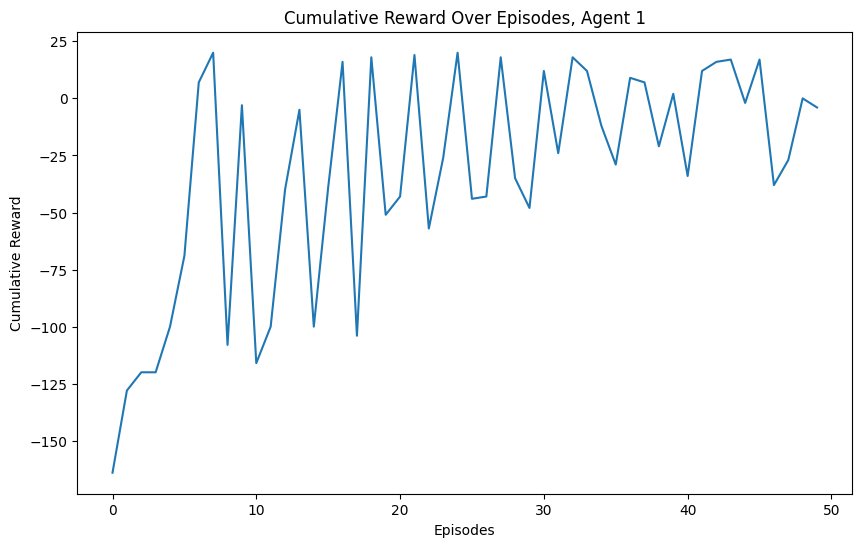

Agent 2 (SARSA) - Sucess Rate = 80.0 %
Agent 2 (SARSA) - Average Reward = -32.28 
Agent 2 (SARSA) - Average Learning Speed = 0.022182786157941437 


In [9]:
from env import StaticGridEnv
from utils import plot_comparison_with_baseline
import pandas as pd
import os 

env = StaticGridEnv(seed =42)
gamma = 0.99  
alpha = 0.8  
epsilon = 0.1
epsilon_decay = 0.99  
epsilon_min = 0.01 
# Initialize the Q-table with zeros
q_table = np.zeros((10, 10, 4))  # Shape: (grid_size, grid_size, action_space)

max_steps_per_episode = 100 
total_episodes= 50
successful_episodes = 0

SARSA_cumulative_rewards = []

total_rewards = 0  # Cumulative reward across all episodes
total_steps = 0    # Cumulative steps across all episodes

#temperature = 1.0  # For softmax method, NOT USED

for episode in range(total_episodes): 
    state = env.reset()
    done = False
    episode_rewards = 0
    
    # For Softmax method, it was not used as we used e.greedy method
    #action, probabilities = select_action_softmax(q_table[state[0],state[1]], temperature) 
    
    # Choose initial action using epsilon-greedy policy
    if np.random.rand() < epsilon:
        action = np.random.randint(0, env.action_space)  # Explore: random action
    else:
        action = np.argmax(q_table[state[0], state[1]])  # Exploit: best known action
        
    for step in range(max_steps_per_episode):
        x, y = state 
        # Take step and observe results
        next_state, reward, done, _ = env.step(action)
        episode_rewards += reward
        next_x, next_y = next_state

        env.render(delay=0.1, episode = episode , learning_type ="SARSA")

        #Choose next action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            next_action = np.random.randint(0, env.action_space)  # Explore: random action
        else:
            next_action = np.argmax(q_table[next_x, next_y])  # Exploit: best known action
        
        # Choose next action using softmax, in case we had decided to use this method
        #next_action, _ = select_action_softmax(q_table[next_x, next_y], temperature)
        
        # Update Q-value using the SARSA formula
        q_table[x, y, action] = q_table[x, y, action] + alpha * (reward + gamma * q_table[next_x, next_y, next_action] - q_table[x, y, action])
        
        state = next_state
        action = next_action

        if done:
            successful_episodes += 1
            break
            
    # Decay the exploration rate after each episode
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    total_rewards += episode_rewards
    SARSA_cumulative_rewards.append(episode_rewards)  # Track cumulative reward per episode
    total_steps += step + 1

env.close()
# Calculate average reward and average learning speed (ALS) after all episodes
avg_reward = total_rewards / total_episodes 
avg_learning_speed = 1 / (total_steps / total_episodes)
success_rate = (successful_episodes / total_episodes) * 100

#Save Q table for Task 4
SARSA_q_table = q_table

# Plot cumulative rewards
plt.figure(figsize=(10, 6))
plt.plot(SARSA_cumulative_rewards)
plt.xlabel("Episodes")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Over Episodes, Agent 1")
plt.show()

print(f"Agent 2 (SARSA) - Sucess Rate = {success_rate} %")
print(f"Agent 2 (SARSA) - Average Reward = {avg_reward} ")
print(f"Agent 2 (SARSA) - Average Learning Speed = {avg_learning_speed} ")

# Save metrics to a CSV file for submission
SARSA_metrics_df = pd.DataFrame({
    "Avg Reward": [avg_reward],
    "Success Rate (%)": [success_rate],
    "Avg Learning Speed": [avg_learning_speed]
})

if os.path.exists("SARSA_metrics.csv"):
    # Append without header
    SARSA_metrics_df.to_csv("SARSA_metrics.csv", mode='a', index=False, header=False)
else:
    # Create file with header if it doesn't exist
    SARSA_metrics_df.to_csv("SARSA_metrics.csv", mode='w', index=False, header=True)

## Task 3 - Teacher Advice Using Q-Learning Agent

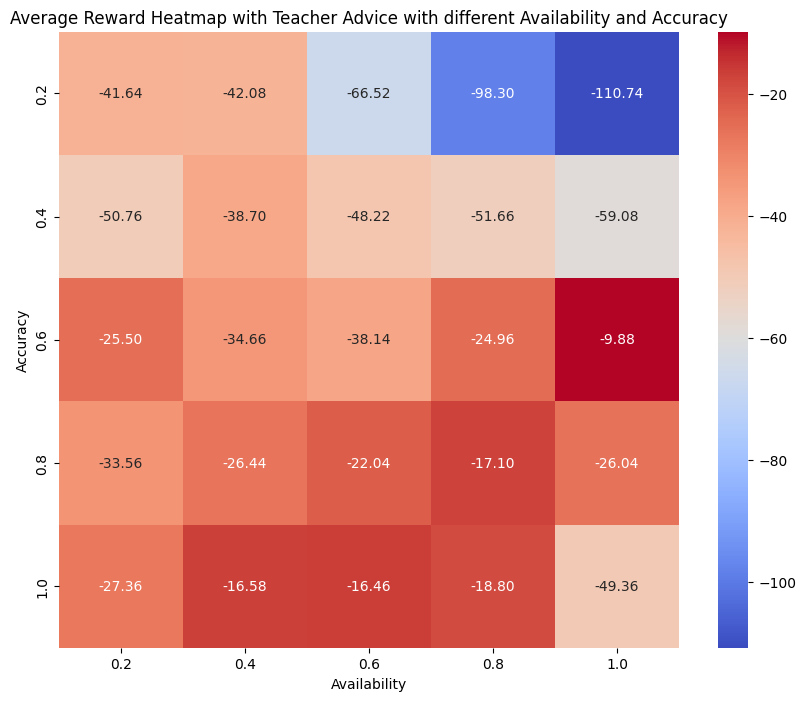

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from env import StaticGridEnv

def provide_teacher_advice_Q(teacher_q_table, current_state, availability, accuracy):
    """Determine if the teacher provides advice and if it is correct."""
    if np.random.rand() < availability:  # Check if teacher advice is available
        x, y = current_state
        best_action = np.argmax(teacher_q_table[x, y])  # Teacher's best action

        # Determine if the advice is accurate
        if np.random.rand() < accuracy:
            return best_action  # Correct advice
        else:
            # Incorrect advice: choose any action except the best action
            action_space = teacher_q_table.shape[2]
            actions = list(range(action_space))
            actions.remove(best_action)
            return np.random.choice(actions)  # Incorrect action
    else:
        return None  # No advice given

def train_new_agent_with_teacher(env, teacher_q_table, availability, accuracy, total_episodes, gamma, alpha, epsilon, epsilon_min, epsilon_decay, max_steps_per_episode):
    total_rewards = 0
    successful_episodes = 0
    steps_per_episode = []

    # Initialize Q-table for the new agent
    q_table_student = np.zeros((10, 10, 4))

    for episode in range(total_episodes):
        state = env.reset()
        done = False
        episode_rewards = 0
        episode_steps = 0

        for step in range(max_steps_per_episode):
            x, y = state
            # Attempt to get teacher advice
            teacher_action = provide_teacher_advice_Q(teacher_q_table, state, availability, accuracy)

            if teacher_action is not None:
                # Follow teacher's advice (whether correct or incorrect)
                action = teacher_action
            else:
                # Use agent's exploration strategy (e.g., ε-greedy)
                if np.random.rand() < epsilon:
                    action = np.random.randint(0, env.action_space)  # Explore
                else:
                    action = np.argmax(q_table_student[x, y])  # Exploit

            next_state, reward, done, _ = env.step(action)
            episode_rewards += reward
            episode_steps += 1

            # Update Q-value for student agent
            best_future_q = np.max(q_table_student[next_state[0], next_state[1]])
            q_table_student[x, y, action] += alpha * (reward + gamma * best_future_q - q_table_student[x, y, action])

            state = next_state
            
            if done:
                successful_episodes += 1
                break

        # Decay the exploration rate after each episode
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        total_rewards += episode_rewards
        steps_per_episode.append(episode_steps)

    # Calculate performance metrics
    avg_reward = total_rewards / total_episodes
    avg_learning_speed = 1 / (np.mean(steps_per_episode)) if steps_per_episode else 0
    success_rate = (successful_episodes / total_episodes) * 100

    return avg_reward, success_rate, avg_learning_speed

def run_experiment_with_teacher_feedback(total_episodes=50, max_steps_per_episode=100):
    gamma = 0.99
    alpha = 0.5
    epsilon = 0.1
    epsilon_decay = 0.995 
    epsilon_min = 0.01  

    # Initialize the environment
    env = StaticGridEnv(seed=42)

    # Train the teacher agent
    teacher_q_table = Q_learning_q_table

    # Define availability and accuracy values
    availability_values = [0.2, 0.4, 0.6, 0.8, 1.0]
    accuracy_values = [0.2, 0.4, 0.6, 0.8, 1.0]

    metrics = []

    # Train new agents with different combinations of availability and accuracy
    for availability in availability_values:
        for accuracy in accuracy_values:
            avg_reward, success_rate, avg_learning_speed = train_new_agent_with_teacher(
                env, teacher_q_table, availability, accuracy, total_episodes, gamma, alpha, epsilon, epsilon_min, epsilon_decay, max_steps_per_episode)
            metrics.append({
                'Availability': availability,
                'Accuracy': accuracy,
                'Avg Reward': avg_reward,
                'Success Rate (%)': success_rate,
                'Avg Learning Speed': avg_learning_speed
            })

    # Create a DataFrame to store metrics
    q_learning_teacher_df = pd.DataFrame(metrics)

    # Pivot the DataFrame for heatmap plotting
    heatmap_data = q_learning_teacher_df.pivot(index='Accuracy', columns='Availability', values='Avg Reward')

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Average Reward Heatmap with Teacher Advice with different Availability and Accuracy")
    plt.xlabel("Availability")
    plt.ylabel("Accuracy")
    plt.show()

    # Save metrics to a CSV file
    q_learning_teacher_df.to_csv("agent_metrics_with_teacher_advice_Q_Learning.csv", index=False)

# Run the experiment
run_experiment_with_teacher_feedback()


## Task 4 - Teacher Advice Using SARSA Agent

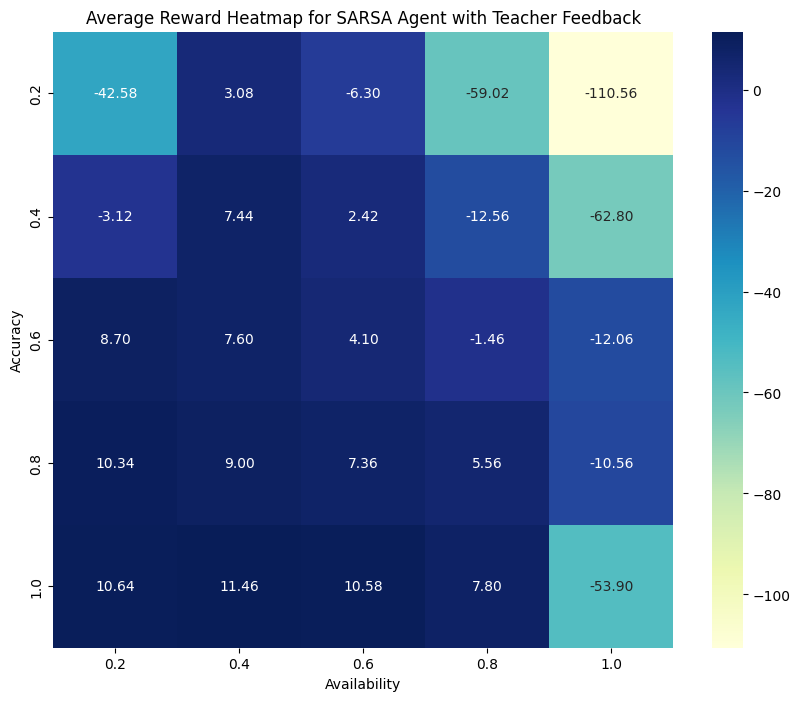

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from env import StaticGridEnv

def provide_teacher_advice_SARSA(teacher_q_table, current_state, availability, accuracy):
    if np.random.rand() < availability:  # Check if teacher advice is available
        x, y = current_state
        best_action = np.argmax(teacher_q_table[x, y])  # Teacher's best action

        # Determine if the advice is accurate
        if np.random.rand() < accuracy:
            return best_action  # Correct advice
        else:
            # Incorrect advice: choose any action except the best action
            action_space = teacher_q_table.shape[2]
            actions = list(range(action_space))
            actions.remove(best_action)
            return np.random.choice(actions)  # Incorrect action
    else:
        return None  # No advice given

def run_sarsa_with_teacher_feedback(total_episodes=50, max_steps_per_episode=100):
    # Define the SARSA parameters
    env = StaticGridEnv(seed=42)
    gamma = 0.99  
    alpha = 0.8  
    epsilon = 0.1
    epsilon_decay = 0.99
    epsilon_min = 0.01
    
    # Q-table for SARSA agent
    q_table = np.zeros((10, 10, 4))
    
    # Teacher Q-table (from a pre-trained agent in Task 1)
    teacher_q_table = SARSA_q_table
    
    # Define availability and accuracy values
    availability_values = [0.2, 0.4, 0.6, 0.8, 1.0]
    accuracy_values = [0.2, 0.4, 0.6, 0.8, 1.0]
    
    metrics = {
        "Availability": [], "Accuracy": [], "Avg Reward": [],
        "Success Rate (%)": [],  "Avg Learning Speed": []
    }
    
    for availability in availability_values:
        for accuracy in accuracy_values:
            successful_episodes = 0
            total_rewards = 0
            total_steps = 0
            
            for episode in range(total_episodes):
                state = env.reset()
                done = False
                episode_rewards = 0
                 # Choose initial action using epsilon-greedy policy
                if np.random.rand() < epsilon:
                    action = np.random.randint(0, env.action_space)  # Explore: random action
                else:
                    action = np.argmax(q_table[state[0], state[1]])  # Exploit: best known action
                
                for step in range(max_steps_per_episode):
                    
                    teacher_advice = provide_teacher_advice_SARSA(teacher_q_table, state, availability, accuracy)
                    
                    if teacher_advice is not None:
                        action = teacher_advice 
                    
                    next_state, reward, done, _ = env.step(action)
                    episode_rewards += reward
                    
                    # Choose next action using epsilon-greedy policy
                    if np.random.rand() < epsilon:
                        next_action = np.random.randint(0, env.action_space)  # Explore: random action
                    else:
                        next_action = np.argmax(q_table[next_state[0], next_state[1]])  # Exploit: best known action
                        
                    # SARSA update
                    q_table[state[0], state[1], action] += alpha * (
                        reward + gamma * q_table[next_state[0], next_state[1], next_action] - q_table[state[0], state[1], action])
                    
                    state = next_state
                    action = next_action
                    
                    if done:
                        successful_episodes += 1
                        break

                epsilon = max(epsilon_min, epsilon * epsilon_decay)
                total_rewards += episode_rewards
                total_steps += step + 1
            
            avg_reward = total_rewards / total_episodes
            avg_learning_speed = 1 / (total_steps / total_episodes)
            success_rate = (successful_episodes / total_episodes) * 100

            metrics["Availability"].append(availability)
            metrics["Accuracy"].append(accuracy)
            metrics["Avg Reward"].append(avg_reward)
            metrics["Success Rate (%)"].append(success_rate)        
            metrics["Avg Learning Speed"].append(avg_learning_speed)
    
    # Convert metrics dictionary to a DataFrame
    sarsa_teacher_df = pd.DataFrame(metrics)

    # Pivot the DataFrame for heatmap plotting
    heatmap_data_SARSA = sarsa_teacher_df.pivot(index='Accuracy', columns='Availability', values='Avg Reward')
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data_SARSA, annot=True, fmt=".2f", cmap='YlGnBu')
    plt.xlabel("Availability")
    plt.ylabel("Accuracy")
    plt.title("Average Reward Heatmap for SARSA Agent with Teacher Feedback")
    plt.show()

    # Save metrics to a CSV file
    sarsa_teacher_df.to_csv("agent_metrics_with_teacher_advice_SARSA.csv", index=False)

# Run the experiment
run_sarsa_with_teacher_feedback()


## Testing and Discussing the Code

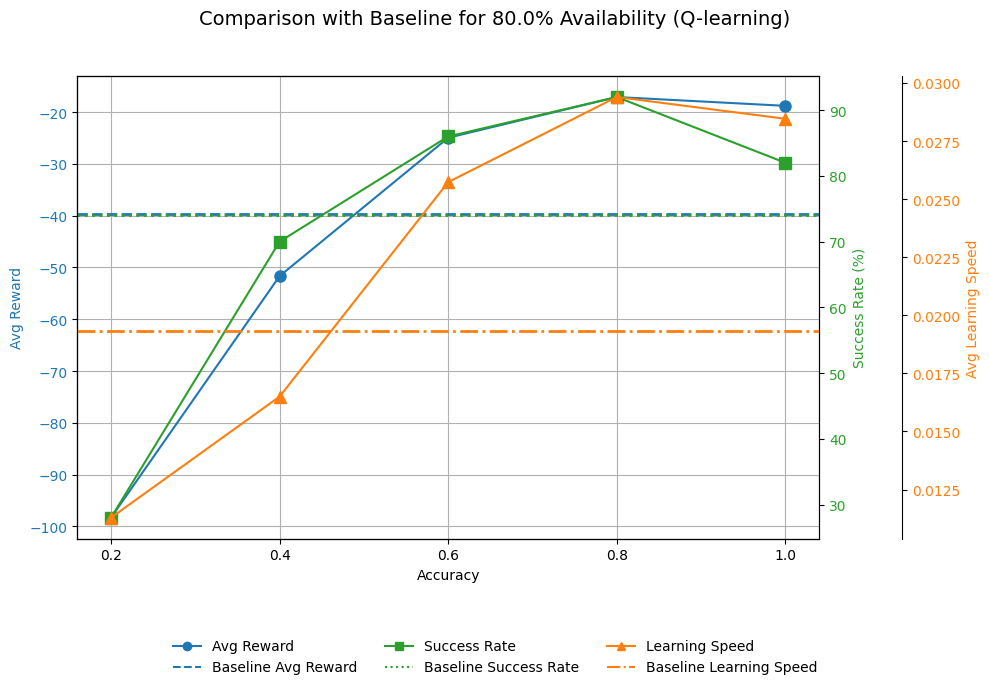

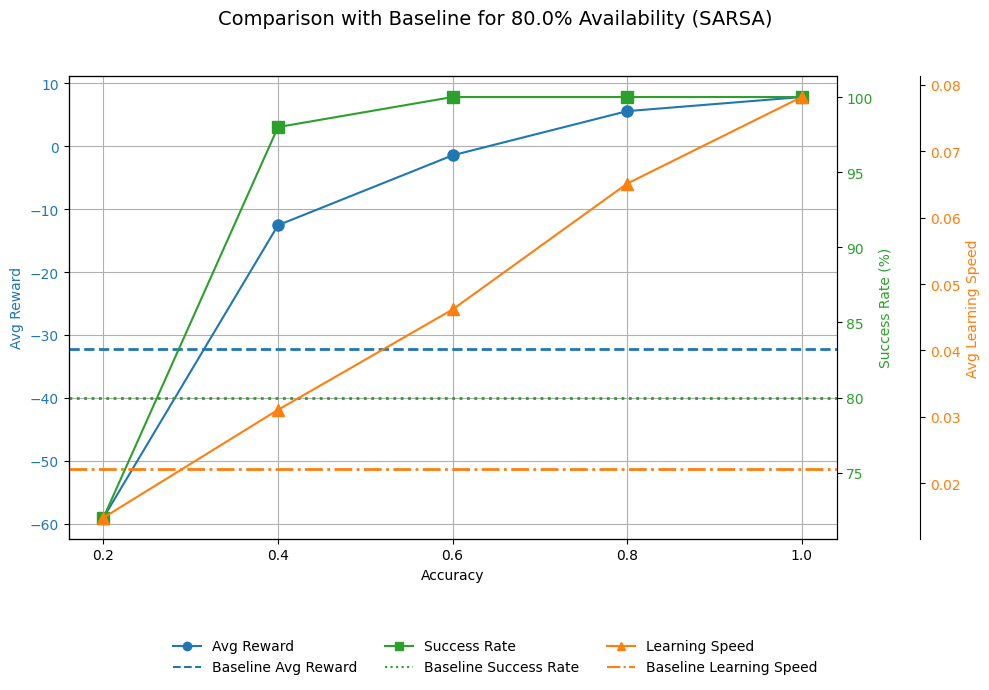

In [15]:
from utils import plot_comparison_with_baseline
import pandas as pd

# Load CSV files into DataFrames
task_1_df = pd.read_csv('Q_learning_metrics.csv')
task_2_df = pd.read_csv('SARSA_metrics.csv')

# Extract the last row from each DataFrame
last_row_task_1 = task_1_df.iloc[-1]  
last_row_task_2 = task_2_df.iloc[-1]  

# Convert the last row to tuples (assuming you want specific columns, e.g., 'Avg Reward', 'Success Rate', 'Learning Speed')
# Replace 'Avg Reward', 'Success Rate', and 'Learning Speed' with actual column names as needed.
tuple_task_1 = (last_row_task_1['Avg Reward'], last_row_task_1['Success Rate (%)'], last_row_task_1['Avg Learning Speed'])
tuple_task_2 = (last_row_task_2['Avg Reward'], last_row_task_2['Success Rate (%)'], last_row_task_2['Avg Learning Speed'])


# Load the DataFrames for Q-learning and SARSA with teacher advice
q_learning_teacher_df = pd.read_csv("agent_metrics_with_teacher_advice_Q_Learning.csv")
sarsa_teacher_df = pd.read_csv("agent_metrics_with_teacher_advice_SARSA.csv")

# Define teacher availability level
availability_level = 0.8

# Plot comparisons
plot_comparison_with_baseline(
    availability=availability_level,
    df_learning=q_learning_teacher_df,
    baseline_learning= tuple_task_1 ,
    algorithm="Q-learning")

plot_comparison_with_baseline(
    availability=availability_level,
    df_learning=sarsa_teacher_df,
    baseline_learning= tuple_task_2,
    algorithm="SARSA")
